## Synthetic late-time light curves from Bateman equation

References:
* Seitenzahl et al (2009). http://dx.doi.org/10.1111/j.1365-2966.2009.15478.x
* Seitenzahl et al (2014). http://dx.doi.org/10.1088/0004-637X/792/1/10
* Graur et al (2016). https://arxiv.org/pdf/1505.00777v3.pdf

In [47]:
# Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import math


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Define constants in CGS

pi = math.pi
au = 1.49597871e13 # cm
pc = 3.08567758e18 # cm
year = 3.e7 # s
t_hubble = 13.8e9 * year # s
mean_stellar_mass = 0.4 # solar masses
mean_bulge_mass = 0.27 # solar masses
msun = 1.987e33 # gm
lsun = 3.8270e33 # erg s^(-1)

In [123]:
# Return luminosity according to Bateman equation; see Seitenzahl et al (2014)
# Time is in units of days, A atomic number, and mass_A mass in solar masses
def luminosity (A, mass_A, time): 
    B = 0.235   # scaling factor - see eqn. 1, Graur et al, 2016

    if (A == 55):
        lambda_A = 6.916e-4  # inverse of half-life (days^-1) of isotope A
        q_A = 3.973 + 0.000 + 0.000 + 1.635  # average energy per decay (keV)
           # Auger e- + IC e- + e+ + Xray
    elif (A == 56):
        lambda_A = 8.975e-3  # inverse of half-life (days^-1) of isotope A
        q_A = 3.355 + 0.374 + 115.7 + 1.588  # average energy per decay (keV)
    
    elif (A == 57): # Co57 decay
        lambda_A = 2.551e-3  # inverse of half-life (days^-1) of isotope 
        q_A = 7.594 + 10.22 + 0.000 + 3.598  # average energy per decay (keV)

    elif (A == 44):
        lambda_A = 3.222e-5  # inverse of half-life (days^-1) of isotope
        q_A = 3.519 + 7.064 + 0.000 + 0.768  # average energy per decay (keV)
    
    else:
        print ('ERROR : isotope not defined.')
        sys.exit ()

    return 2.221 * (B / A) * lambda_A * mass_A * q_A * math.exp (-lambda_A * time) * 1.e43   # erg/s

# Return luminosity in erg/s given absolute magnitude
def magtolum (mag):
    absolute = mag - 5. * (math.log (15.2e6, 10.) - 1.)
    fac = (100.)**(1./5.)
    return fac**(4.83 - absolute) * lsun

# Input arrays of abundances and time, print plots of late-time light curves
def plotter (abundances, times, mass_co56, mass_ti44, bounded = False):
    
    # Abundances from models / observations
    # [Co56, Co57, Fe55, Ti44] or 
    # [Co56, Co57, Co57_low, Co57_high, Fe55, Fe55_low, Fe55_high, Ti44]


    atom = [56, 57, 55, 44]

    # Shappee et al, 2017 data
    abundances = [mass_co56, 0.029*mass_co56, 0.029*mass_co56*0.22, mass_ti44]

    # Graur et al, 2016 data
    #abundances = [mass_co56, 0.043*mass_co56, 0.043*mass_co56*1.25, mass_ti44]

    # Dave et al, DDT
    #abundances = [mass_co56, 0.033*mass_co56, 0.043*mass_co56*2.2373, mass_ti44]

    # Graur et al, 2016 data bounded
    #abundances = [mass_co56, 0.043*mass_co56, (.043 - .011)*mass_co56, (.043 + .012)*mass_co56, 0.043*mass_co56*1.25, (.043 - .011)*mass_co56*1.25, (.043 + .012)*mass_co56*1.25,  mass_ti44] 

    # Dave et al, DDT bounded
    #abundances = [mass_co56, 0.033*mass_co56, (0.033-0.011)*mass_co56, (0.033+0.012)*mass_co56, 0.033*mass_co56*2.2373, (0.033-0.011)*mass_co56*2.2373, (0.033+0.012)*mass_co56*2.2373, mass_ti44]

    # Dave et al, GCD bounded
    #abundances = [mass_co56, (0.034)*mass_co56, (0.034-0.011)*mass_co56, (0.034+.012)*mass_co56, 2.06*(0.034)*mass_co56, 2.06*(0.034-0.011)*mass_co56, 2.06*(0.034+.012)*mass_co56, mass_ti44]
    
    labels = ['$^{56}$Co ='+str(mass_co56)+' $M_{\odot}$','$^{57}$Co/$^{56}$Co = 0.029','$^{55}$Fe/$^{57}$Co=0.22', '$^{44}$Ti ='+str(mass_ti44)+' $M_{\odot}$', 'Total']
    lum_list = []
    
    if bounded == False:
        colors = ['red', 'green', 'blue', 'brown', 'black']
        styles = ['-', '--', '-.', ':', '-']
        
        for i, abundance in enumerate(abundances):
            lum_list.append([luminosity(atom[i], abundance, time) for time in times])
        
        lum_list.append([sum(x) for x in zip(*lum_list)])
        lum_list = np.array(lum_list)
        
        fig, ax = plt.subplots (1)
        
        for j in range(len(lum_list)):
            ax.plot(times, np.log10(lum_list[j]), label = labels[j], linewidth = 2, color=colors[j], linestyle=styles[j])

        plt.xlim( [times[0], times[-1]] )
        plt.ylim( [30.5, 40] )
        plt.xlabel ('Time (d)')
        plt.ylabel ('Luminosity (erg s$^{-1}$)')
        plt.title ('SN 2011fe Late-Time Luminosity vs. time')
        plt.rcParams.update ( {'font.size' : 13})
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.show()

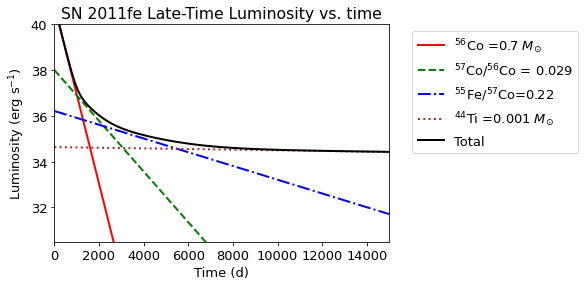

In [124]:
plotter (abundances, np.linspace (0., 15000., 100), 0.7, 1.e-3, bounded = False)

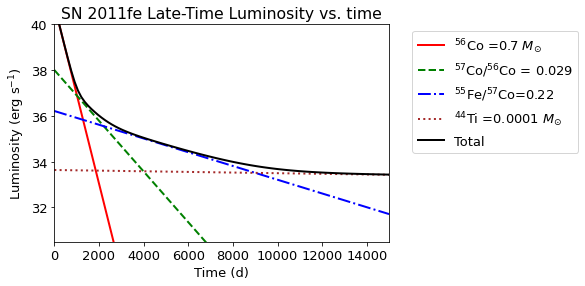

In [125]:
plotter (abundances, np.linspace (0., 15000., 100), 0.7, 1.e-4, bounded = False)

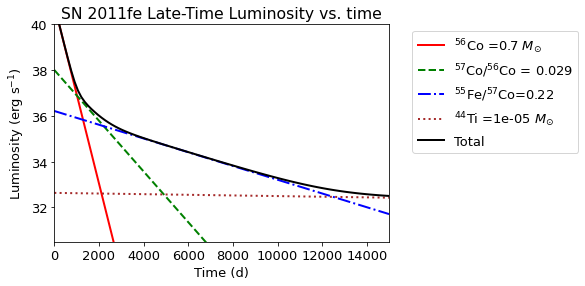

In [126]:
plotter (abundances, np.linspace (0., 15000., 100), 0.7, 1.e-5, bounded = False)